# seaborn学习笔记-统计关系可视化之relplot

```python
seaborn.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
```
参数：x,y: data中的列名
   - 输入变量，必须是数值型    
   hue：data中的列名（可选）        
   - 用不同颜色对变量分组，类别或者数值
   size: data中的列名（可选）    
   - 用不同的大小对变量分组，类别或者数值
   style: data中的列名（可选）    
   - 用不同的仰视对变量分组，可以是数值但会被视为类别
   row,col: data中的列名（可选）    
   - 用于决定Facegrid中的每个格网切面
   col_wrap: 整型（可选）    
   - 自定义Facegrid中各个图的行列排序方式    
   row_order,col_orde:字符串列表（可选）    
   - Facegrid中每行的列数    
   platte: 调色板，字符串列表或者字典（可选）   
   - hue变量使用的调色板       
   hue_order: 列表（可选）
   - 自定义调色板中颜色的选择方式，当hue为数值型时，该变量无效    
   hue_norm: 元组或者归一化对象（可选）
   - 归一化hue,当hue为类别时，该变量无效    
   sizes：字典、列表或元组（可选）
   - 当设置size变量时用于控制大小    
   size_order: 列表（可选）
   - 自定义sizes的选择方式，当size为数值型时，该变量无效    
   size_norm： 元组或者归一化对象（可选）
   - 归一化size
   legend: "brief"、"full"或则False（可选）
   - 图例,对于数值型变量，brief仅显示部分    
   kind: string（可选)
   - line或者scatter    
   height: 数值常量
   - 字图的高度    
   aspect: 数值常量
   - 宽高比 height*aspect 为字图宽度   
   facet_kws：字典（可选)
   - 传递给FacetGrid的参数
   kwargs: 键值对
   - 其他参数   
   
返回值: g:FacetGrid
   - 返回FacetGrid    
   
replot函数是用于在FacetGrid上绘制关系图的Figure-level函数。此函数提供了对几个不同axes-level函数的访问，这些axes-level函数通过语义映射显示数据集中多个变量之间的关系。kind参数用于控制使用哪个axes-level函数：
* scatterplot() (kind="scatter",默认情况)
* lineplot() (kind="line")

In [25]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## 散点图

In [26]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1. 散点图是统计可视化的基础。它使用点云描述两个变量的联合分布，其中每个点表示数据集中的一个观察值。

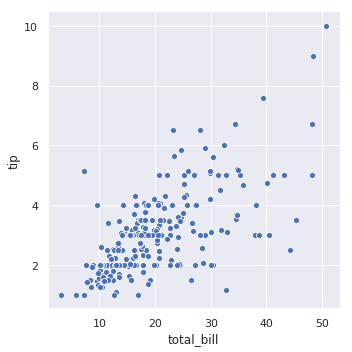

In [2]:
sns.relplot(x="total_bill", y="tip", data=tips)

2. 尽管散点图是二维的，但是可以通过给点着色来表示第三维变量。

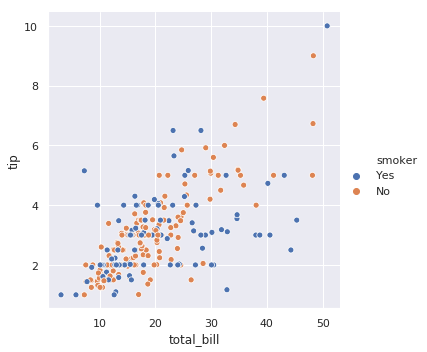

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

3. 为了强调类别之间的差异，并提高可识别性，可以对每个类别使用不同的样式。

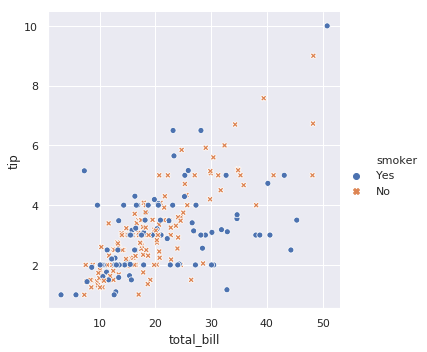

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",data=tips)

4. 通过独立地改变每个点的颜色和样式来表示四个变量。

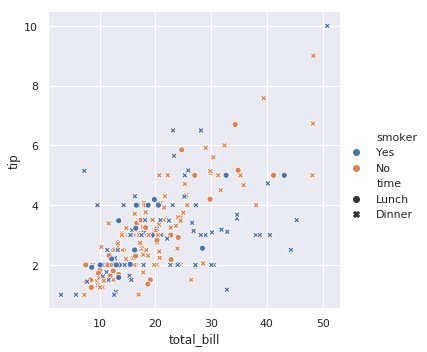

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

5. 如果hue是连续数值而不是离散的，则颜色的深浅代表不同的取值

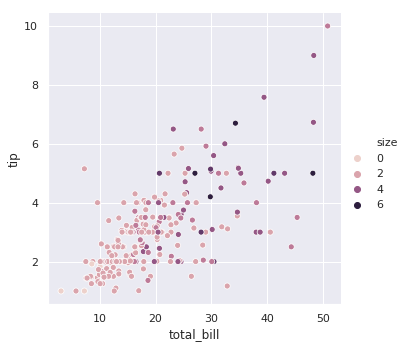

In [27]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

6. 也可以自定义颜色

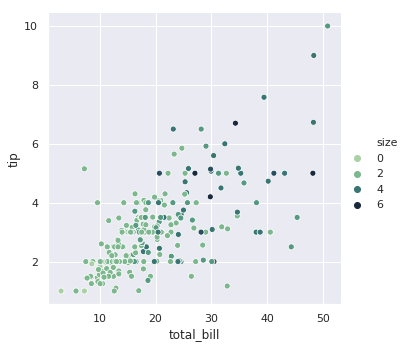

In [28]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)

7. 除了颜色和样式，大小也可以表示维度

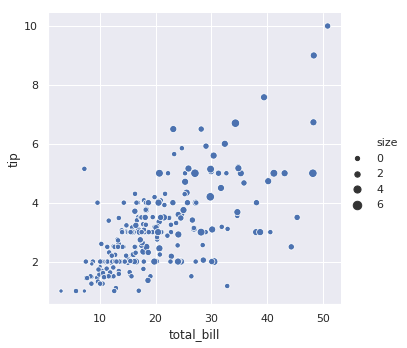

In [29]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

8. 可以自定义大小

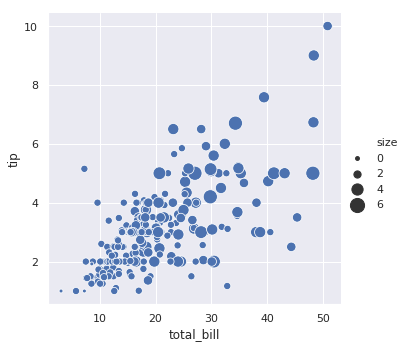

In [30]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

## 折线图

In [32]:
df = pd.DataFrame(dict(time=np.arange(500),value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,-1.628097
1,1,-0.481164
2,2,-1.086899
3,3,-0.686817
4,4,-0.976437


1. 在某些情况下需要观察一个连续变量随着另一个变量的变化时，折线图是一个很好的选择。在seaborn中通过设置relplot的kind参数值为line，可以绘制折线图。

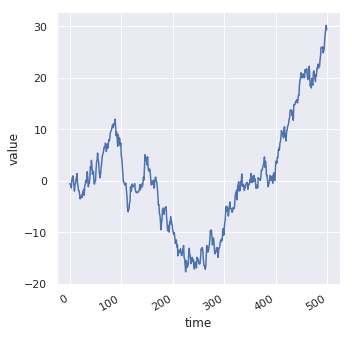

In [12]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

默认情况下会对x进行排序，通过设置sort参数的值为False来禁止排序。

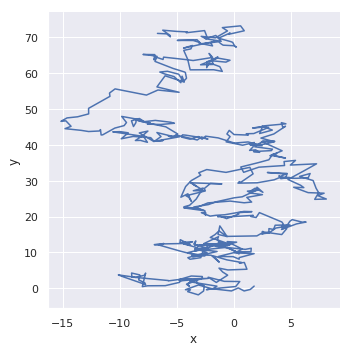

In [13]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df)

2. 聚合和不确定性表示

In [33]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


复杂的数据集会有多种方式测量同一个变量x的值。seaborn中默认的方式是在每一个x处通过绘制均值和95%的置信区间来聚合这些测量值。

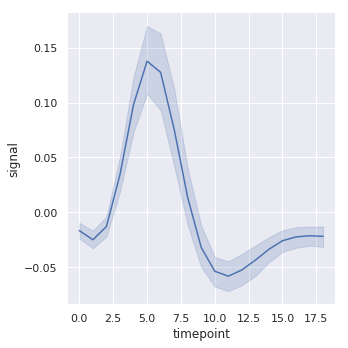

In [34]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

置信区间是通过bootstrapping方法计算的，对于较大的数据集计算比较耗时，通过ci参数可以禁用置信区间。

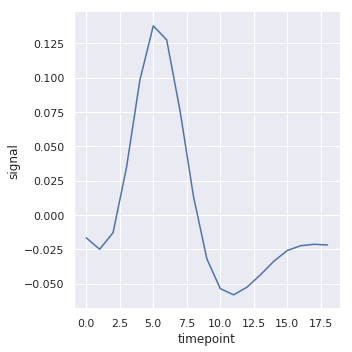

In [16]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

对于较大的数据集另一种方法是通过绘制标准偏差而不是置信区间来表示每个时间点的分布。

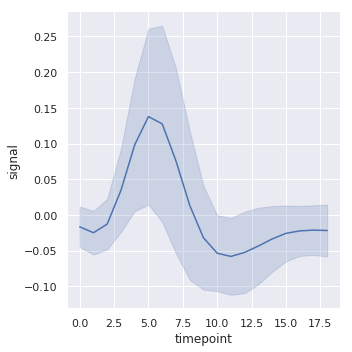

In [18]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

通过设置estimator为None可以禁用聚合功能，但当同一位置有多个观测值时，图形可能看起来很奇怪。

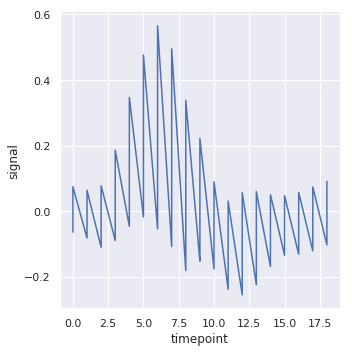

In [19]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri)

3. 使用语义映射绘制数据集的子集

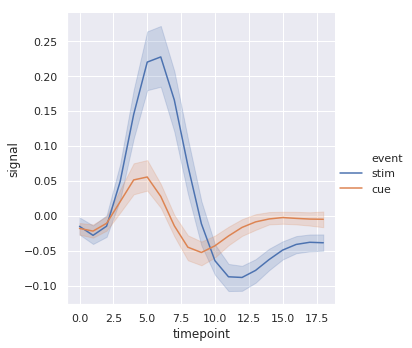

In [35]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

与散点图相同，折线图也可以通过改变颜色、大小和样式来表示更多的变量。

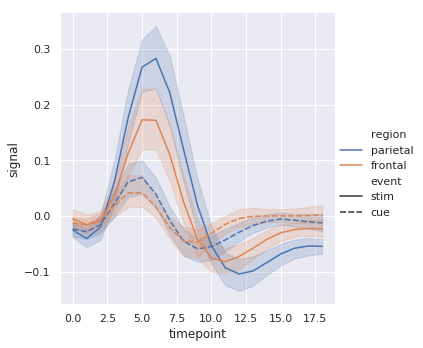

In [36]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",kind="line", data=fmri)

使用重复测量数据（即有多次采样的单位）时，可以单独绘制每个采样单位，比如对”subject”单位绘图。

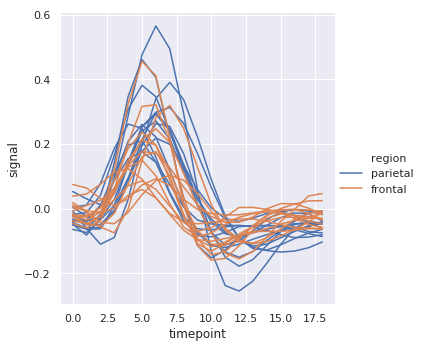

In [37]:
sns.relplot(x="timepoint", y="signal", hue="region",units="subject", estimator=None,kind="line", data=fmri.query("event == 'stim'"));

默认的色彩映射和图例的处理还取决于色调语义是分类还是数字

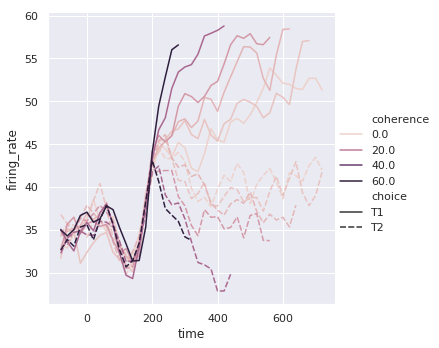

In [40]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots.head(4)
sns.relplot(x="time", y="firing_rate",hue="coherence", style="choice",kind="line", data=dots)

通过传递列表或字典为每一行提供特定的颜色值

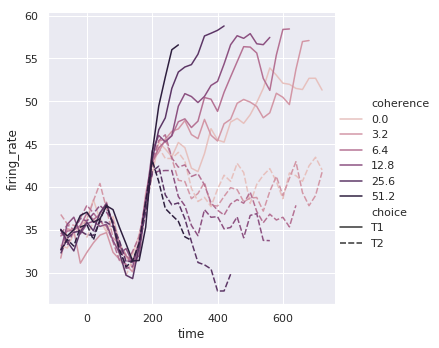

In [41]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",hue="coherence", style="choice",palette=palette,kind="line", data=dots);

4. 时间序列绘图

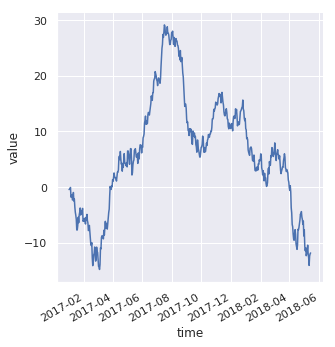

In [42]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

## 利用facet显示多元关系

1. 通过col参数绘制多列

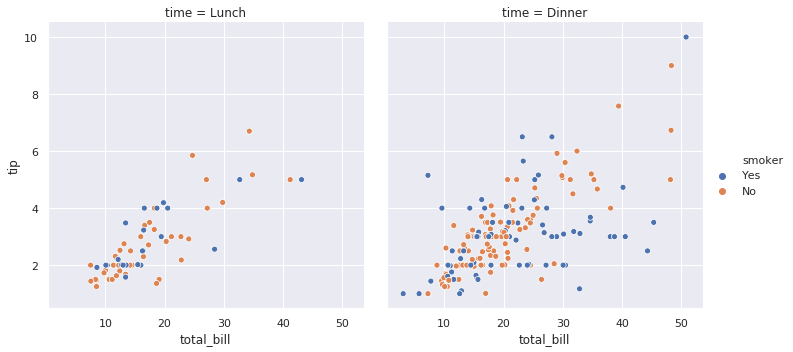

In [20]:
sns.relplot(x="total_bill", y="tip", hue="smoker",col="time", data=tips)

2. 通过row参数设置多行

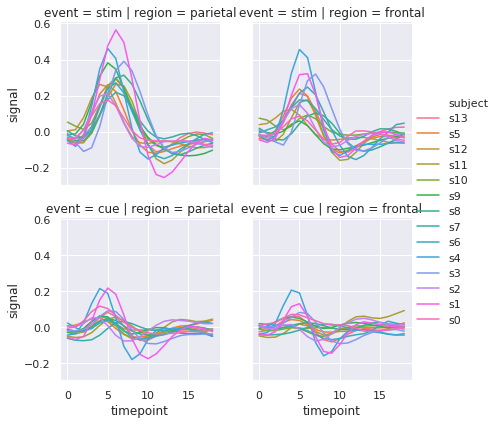

In [21]:
sns.relplot(x="timepoint", y="signal", hue="subject",col="region", row="event", height=3,kind="line", estimator=None, data=fmri)

3. 通过col_wrap参数设置列数,height参数设置高度，aspect设置宽高比，linewidth设置线宽

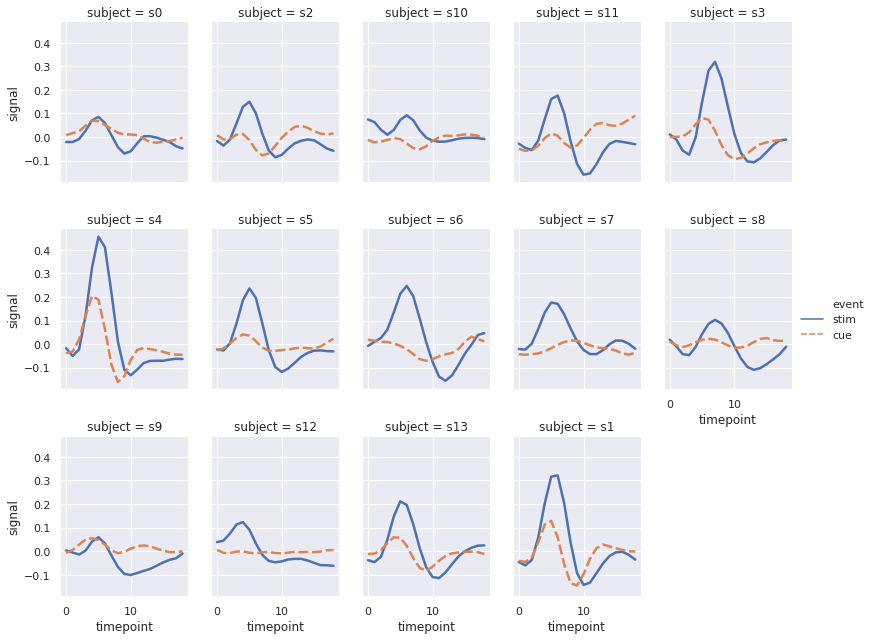

In [24]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",col="subject", col_wrap=5,height=3, aspect=.75, linewidth=2.5,kind="line", data=fmri.query("region == 'frontal'"))